<a href="https://colab.research.google.com/github/prpawan03/marvel-lvl2/blob/main/task3/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [ ]:
data = pd.read_csv("AB_NYC_2019.csv")


In [ ]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
data.shape

(48895, 16)

In [ ]:
data.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
data.isnull().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [ ]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

dropping unnecessary columns such as id, name, host_name, last_review

In [ ]:
data.drop(['id','name','host_name','last_review'], axis=1)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2


replacing null values with 0

In [ ]:
data.reviews_per_month.fillna(0, inplace=True)

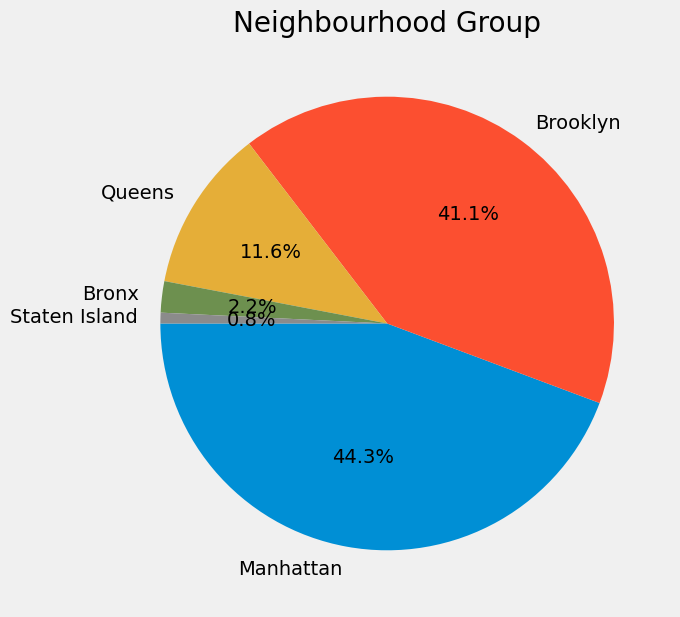

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(nyc_df.neighbourhood_group.value_counts(), labels=nyc_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

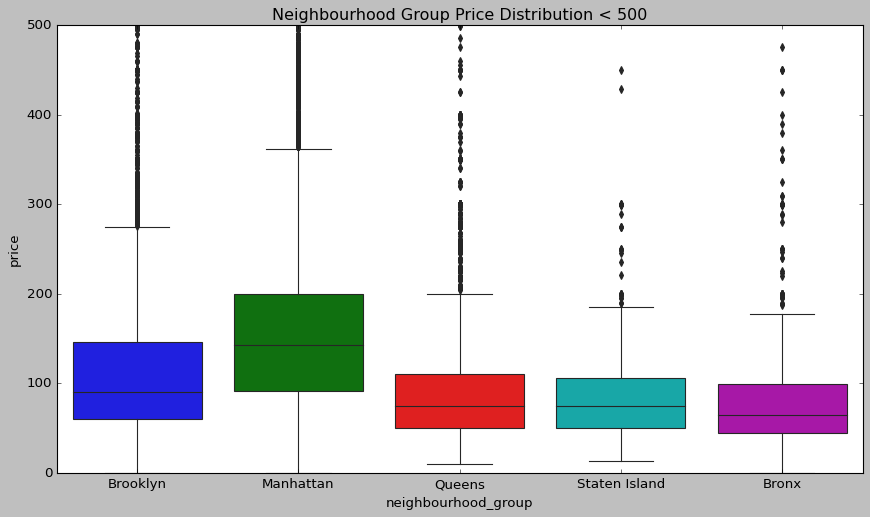

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group Price Distribution < 500")
sns.boxplot(y="price",x ='neighbourhood_group' ,data = data[data.price<500])
plt.show()

<ipython-input-40-949a159bfaa2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr(method='kendall')


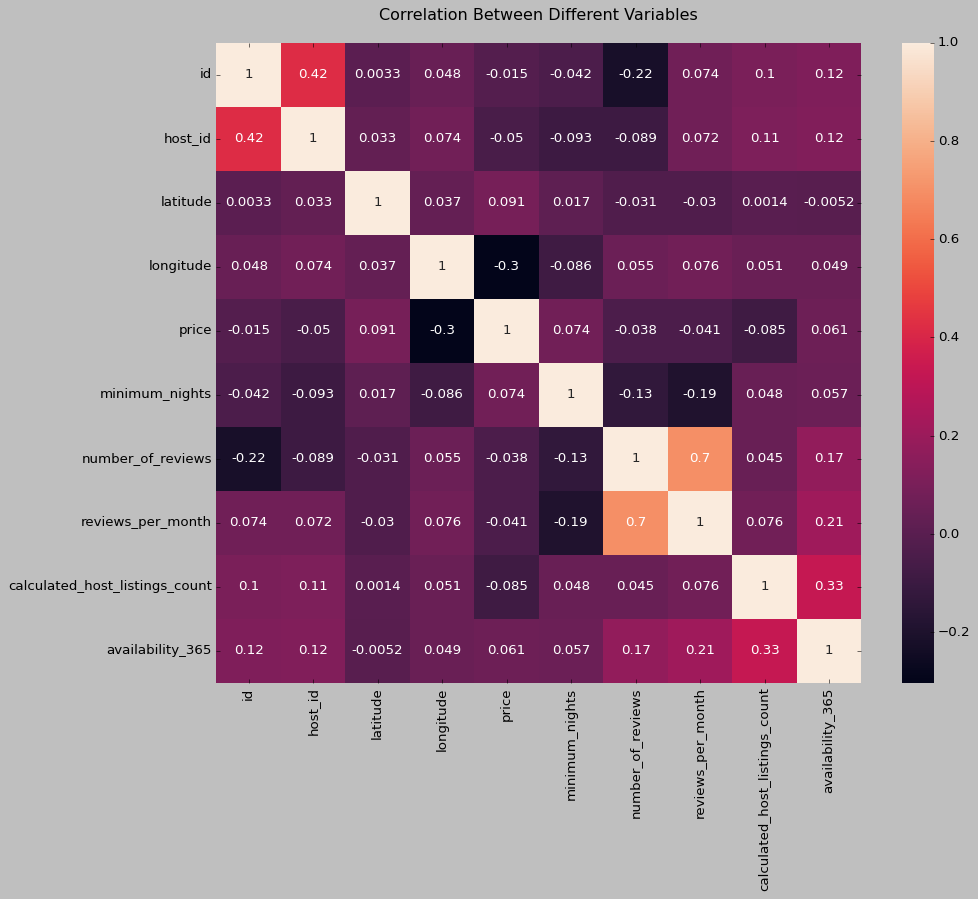

In [ ]:
# #correlation
corr = data.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()

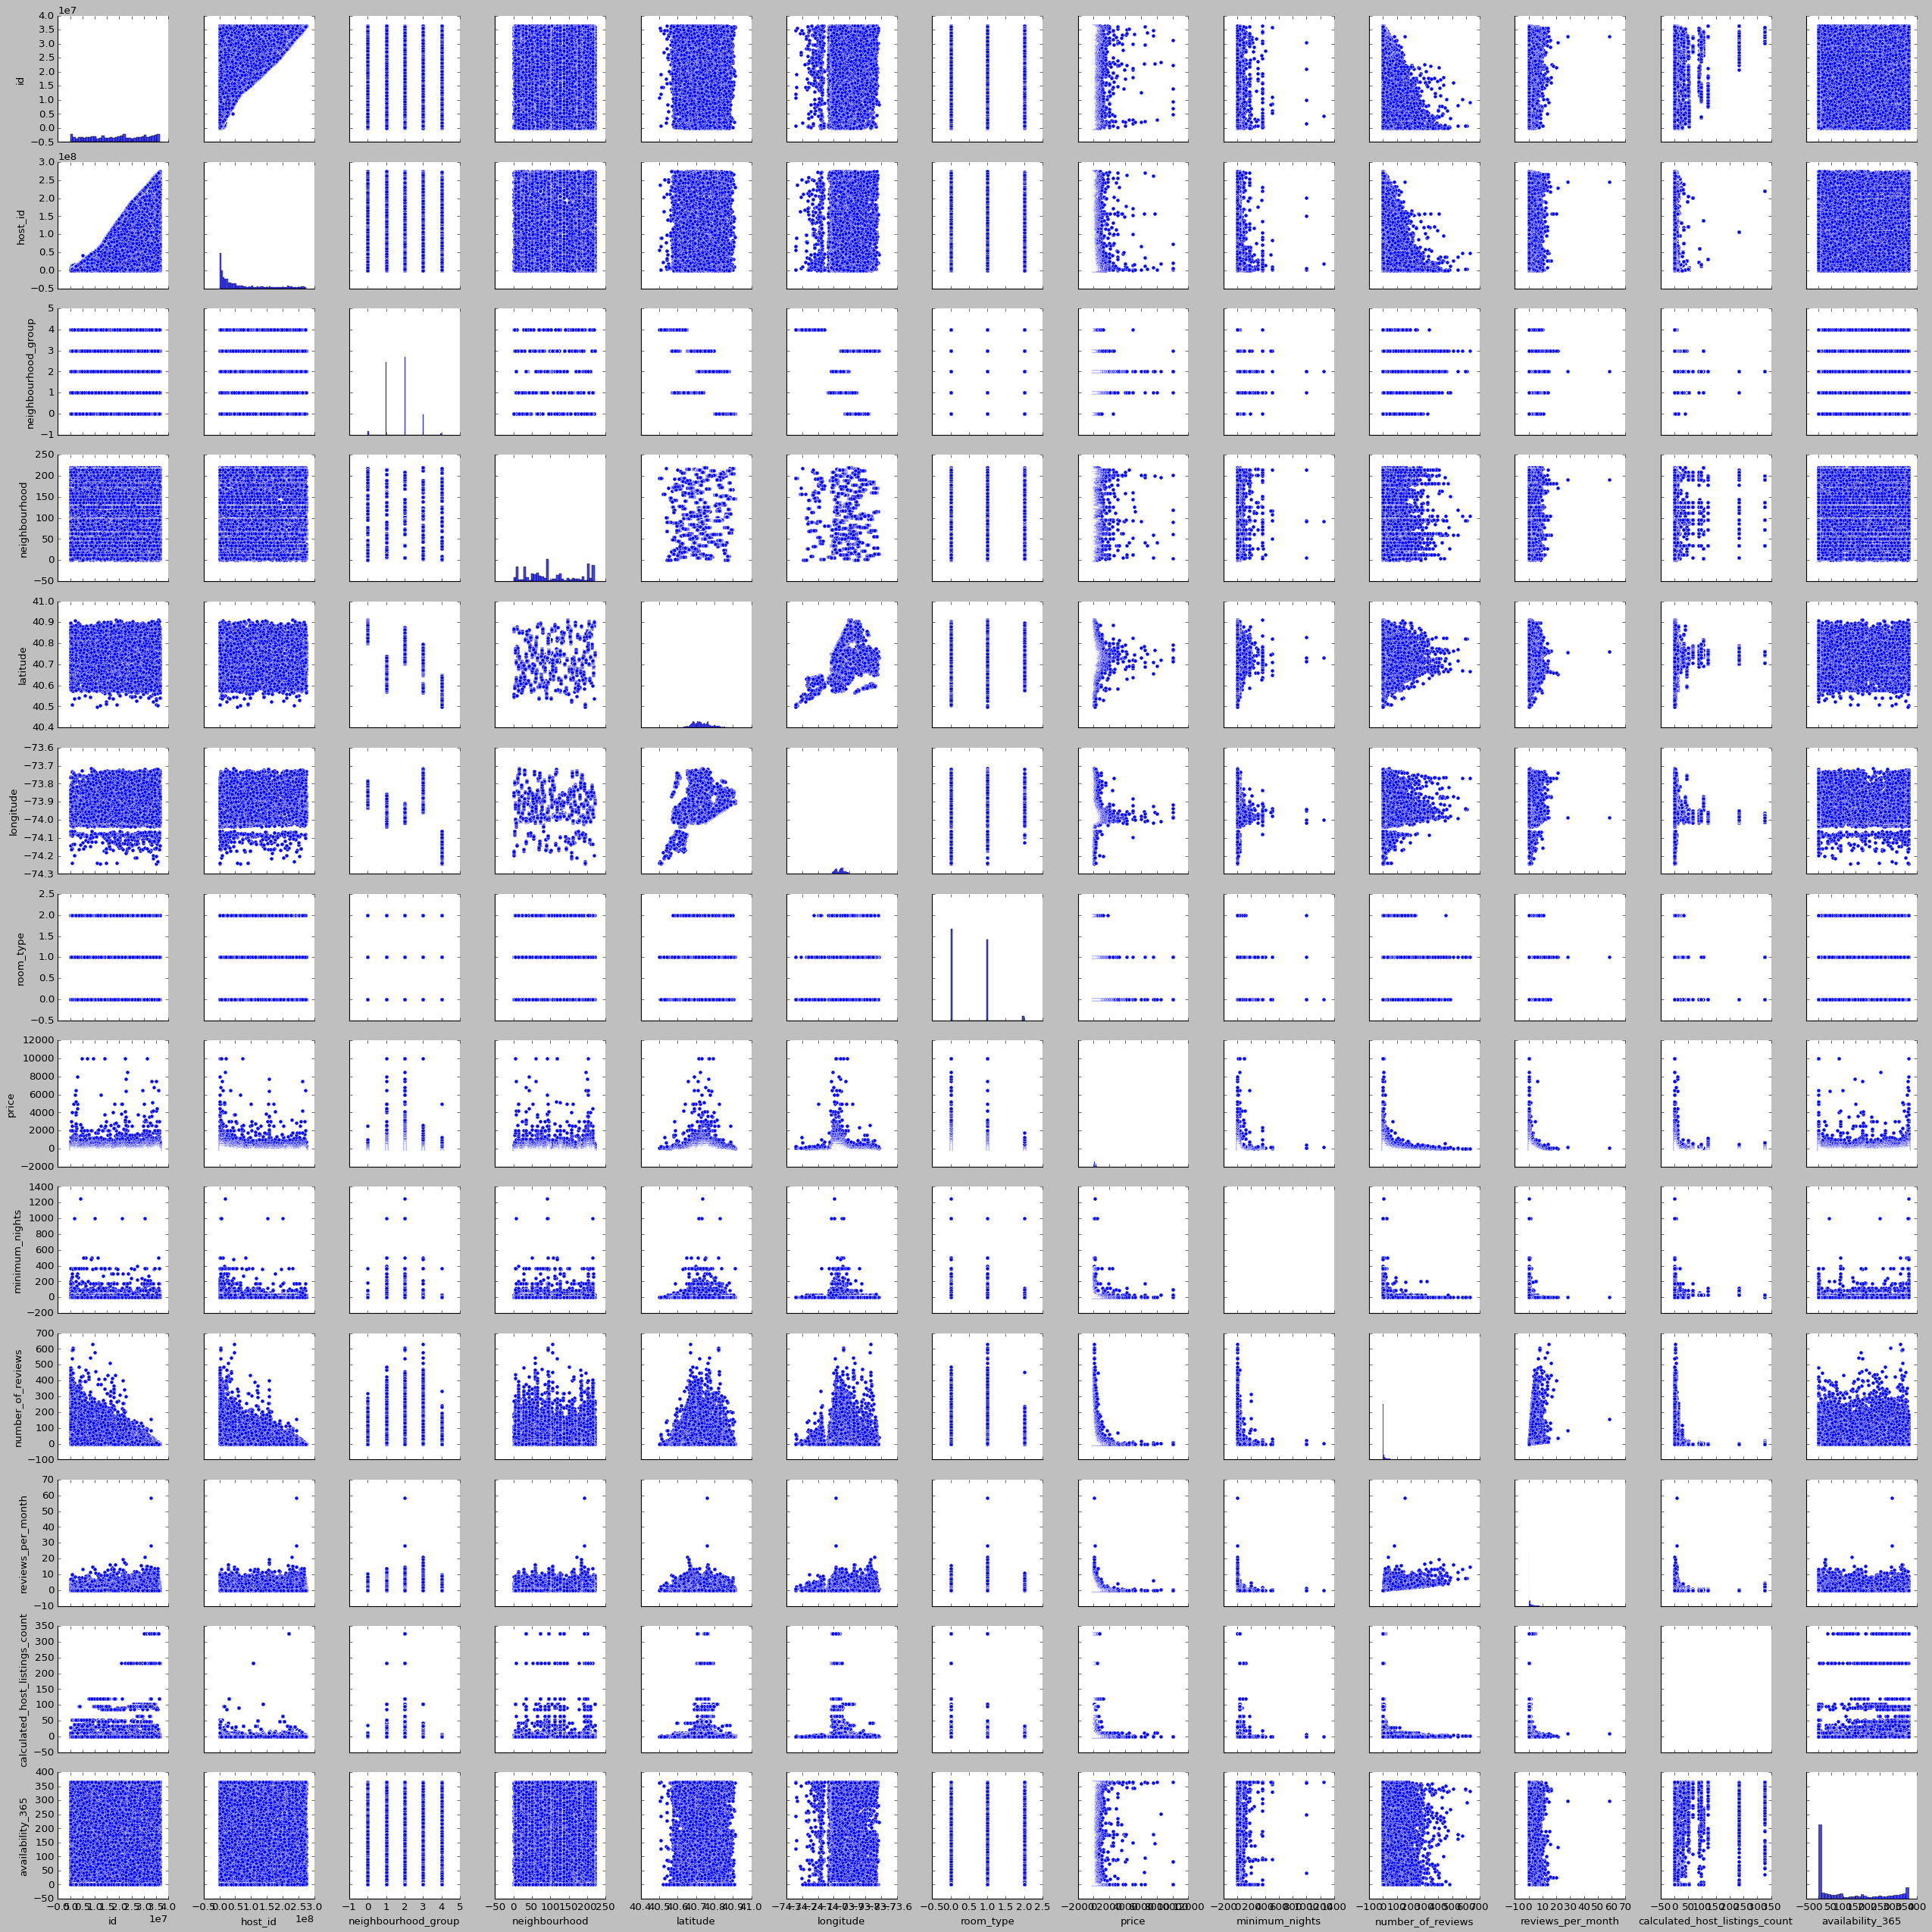

In [ ]:
sns.pairplot(data)

linear regression

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')

In [ ]:
encode = preprocessing.LabelEncoder()
#fit label encoder
encode.fit(data.neighbourhood_group)
data.neighbourhood_group=encode.transform(data.neighbourhood_group)

# Transform labels to normalized encoding
encode = preprocessing.LabelEncoder()
encode.fit(data.neighbourhood)
data.neighbourhood=encode.transform(data.neighbourhood)

encode = preprocessing.LabelEncoder()
encode.fit(data.room_type)
data.room_type=encode.transform(data.room_type)

data.sort_values(by='price',ascending=True,inplace=True)

# print(nyc_df.head(20))

#Train linier regression model

l_reg = LinearRegression()

X = data[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

l_reg.fit(X_train,y_train)

#prediction

predicts = l_reg.predict(X_test)

In [ ]:
print("Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, predicts)))
print("R2 Score: ", r2_score(y_test,predicts) * 100)
print("Mean Absolute Error: ", mean_absolute_error(y_test,predicts))
print("Mean Squareroot Error: ", mean_squared_error(y_test,predicts))


Mean Squared Error:  179.84628861015997
R2 Score:  12.50553858277188
Mean Absolute Error:  72.03056571573508
Mean Squareroot Error:  32344.687526848953


In [ ]:
lr_pred_df = pd.DataFrame({
        'actual_values': np.array(y_test).flatten(),
        'predicted_values': predicts.flatten()}).head(20)

print(lr_pred_df.head(5))

   actual_values  predicted_values
0            400        222.770335
1            140        218.584987
2            195        261.122925
3            120        230.613106
4             88        113.732972


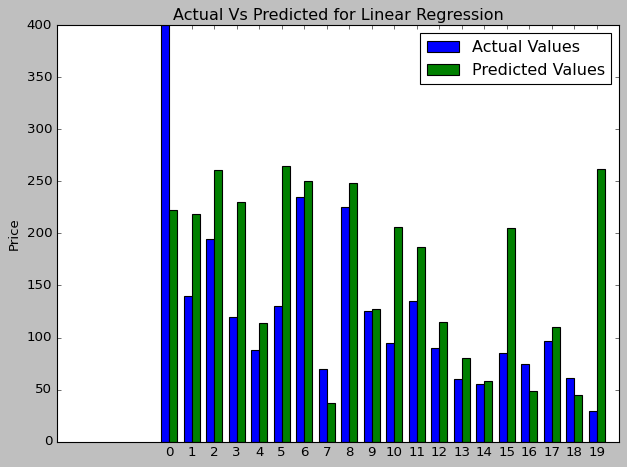

In [ ]:
x = lr_pred_df.index
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lr_pred_df.actual_values, width, label='Actual Values')
rects2 = ax.bar(x + width/2, lr_pred_df.predicted_values, width, label='Predicted Values')
ax.set_ylabel('Price')
ax.set_title('Actual Vs Predicted for Linear Regression')
ax.set_xticks(x)
ax.legend()
fig.tight_layout()
plt.show()